### Importing packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from io import StringIO
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score


In [2]:
df = pd.read_csv('QualityPrediction.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

### Checking for duplicates

In [7]:
duplicates = df.duplicated()
print(duplicates.sum())

240


In [8]:
# Drop the duplicates
df.drop_duplicates(inplace=True)

### Checking for Null Values

In [9]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Creating boxplot for all variables

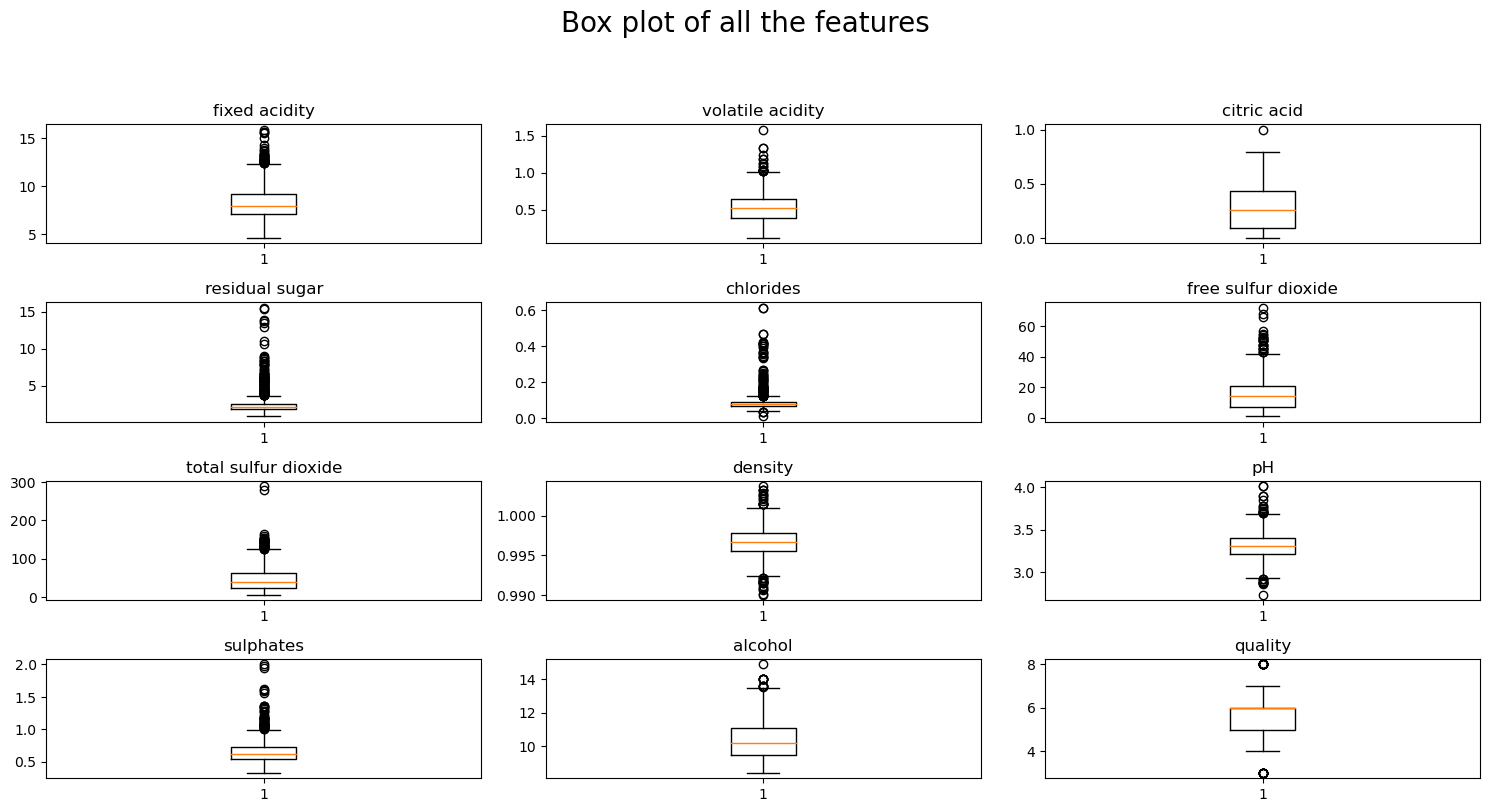

In [10]:
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Box plot of all the features', fontsize=20)
for i in range(df.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(df.columns.values[i])

    vals = np.size(df.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    
    plt.boxplot(df.iloc[:, i])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

### Treating Outliers

- Detect the outliers using z_score method
- If z_score > 3 or z_score < 3 it's counted as an outlier, which needs to be treated in order to get a generalized base model
- Replaced the outliers with median

In [ ]:
for column in df.columns:
    # Calculate the z-scores for each data point in the column
    z_scores = (df[column] - df[column].mean()) / df[column].std()
    
    # Replace outliers with median
    df[column] = np.where((z_scores > 3) | (z_scores < -3), df[column].median(), df[column])

#### Choosing IQR method over z_score since the central tendancy used in z_score is mean, outliers cannot be detected and treated properly

### Treating Outliers

- Detect the outliers using IQR method
- If IQR > UP or IQR < LL it's counted as an outlier, which needs to be treated in order to get a generalized base model
- Outliers are removed

In [11]:
for column in df.columns:
    # Calculate quartiles and interquartile range (IQR)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Determine the upper and lower bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove outliers from the DataFrame
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


<Axes: >

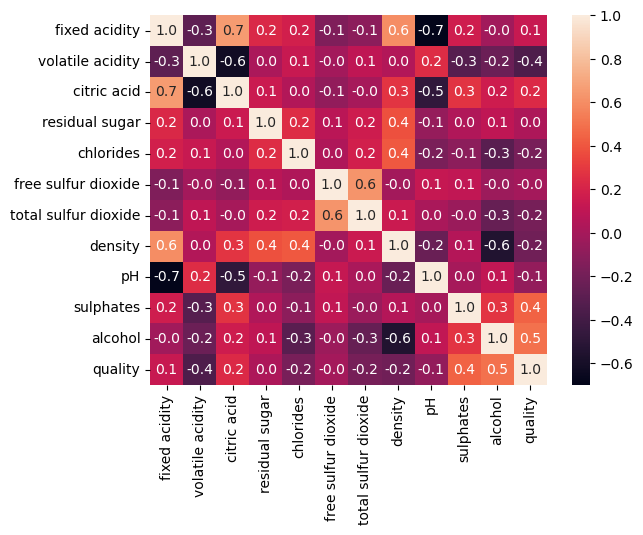

In [12]:
sns.heatmap(data=df.corr(),annot=True,fmt=".1f")

### Feature Selection

In [51]:
# separate the data and Label
X = df.drop(columns=['quality'])
X.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4


In [52]:
Y = df['quality']
Y.head()

0    5
1    5
2    5
3    6
5    5
Name: quality, dtype: int64

### Check how features are distributed

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

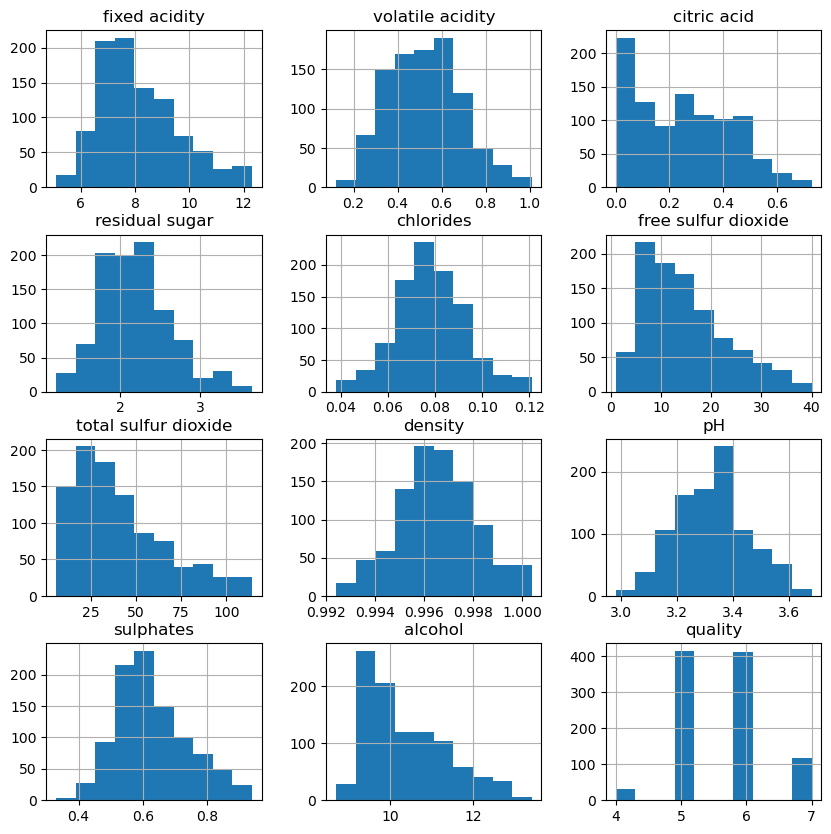

In [53]:
df.hist(figsize=(10,10))

### Splitting the data into training and testing

In [54]:
X_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3,random_state = 32)

In [55]:
# Cleaning test sets to avoid future warning messages
y_train = y_train.ravel()
y_test = y_test.ravel()

### Scaling Data 

In [56]:
standard_Scaler = StandardScaler()
X_train = standard_Scaler.fit_transform(X_train)
x_test = standard_Scaler.transform(x_test)

### Wine Prediction model using Logistic Regression

In [57]:
# Initialize the model
log_reg=LogisticRegression()

# Train the model
log_reg.fit(X_train,y_train)

# Predict target variable with unseen data
y_pred=log_reg.predict(x_test)

In [58]:
accuracy = np.around(metrics.accuracy_score(y_test,y_pred),2)
precision = np.around(metrics.precision_score(y_test,y_pred,zero_division=True,average=None),2)
recall = np.around(metrics.recall_score(y_test, y_pred,average=None),2)
f1 = np.around(metrics.f1_score(y_test, y_pred,average=None),2)

In [59]:
results = pd.DataFrame([['Logistic Regression', accuracy, precision, recall, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.63,"[0.0, 0.69, 0.62, 0.43]","[0.0, 0.75, 0.6, 0.42]","[0.0, 0.72, 0.61, 0.43]"


### Wine prediction model using Decision Tree

In [60]:
# Initialize the model
dt = DecisionTreeClassifier()

# Train the model
dt.fit(X_train,y_train)

# Predict target variable with unseen data
y_predict=dt.predict(x_test)

In [61]:
accuracy = np.around(metrics.accuracy_score(y_test,y_pred),2)
precision = np.around(metrics.precision_score(y_test,y_pred,zero_division=True,average=None),2)
recall = np.around(metrics.recall_score(y_test, y_pred,average=None),2)
f1 = np.around(metrics.f1_score(y_test, y_pred,average=None),2)

In [62]:
dt_results = pd.DataFrame([['Decision Tree', accuracy, precision, recall, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = pd.concat([results,dt_results],ignore_index=True)

results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.63,"[0.0, 0.69, 0.62, 0.43]","[0.0, 0.75, 0.6, 0.42]","[0.0, 0.72, 0.61, 0.43]"
1,Decision Tree,0.63,"[0.0, 0.69, 0.62, 0.43]","[0.0, 0.75, 0.6, 0.42]","[0.0, 0.72, 0.61, 0.43]"


### Wine prediction model using Random Forest

In [63]:
# Initialize the model
fit_rf = RandomForestClassifier(random_state=42,)

# Train the model
fit_rf.fit(X_train,y_train)

# Predict target variable with unseen data
y_pred=dt.predict(x_test)

In [64]:
accuracy = np.around(metrics.accuracy_score(y_test,y_pred),2)
precision = np.around(metrics.precision_score(y_test,y_pred,zero_division=True,average=None),2)
recall = np.around(metrics.recall_score(y_test, y_pred,average=None),2)
f1 = np.around(metrics.f1_score(y_test, y_pred,average=None),2)

### GridSearchCV for finding best parameters

In [27]:
np.random.seed(42)
start = time.time()

param_dist = {'max_depth': [2, 3, 4, 5],
              'bootstrap': [True, False],
              'max_features': ['sqrt', 'log2', None],
              'min_samples_leaf': [5,6,7,8,9],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(fit_rf, cv = 5,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_rf.fit(X_train, y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'min_samples_leaf': 5}
Time taken in grid search:  145.41


In [65]:
# Set best parameters given by grid search 
fit_rf.set_params(n_estimators = 200,criterion = 'gini', bootstrap=True,
                  max_features = None,
                  max_depth = 4)

RandomForestClassifier(max_depth=4, max_features=None, n_estimators=200,
                       random_state=42)

In [66]:
# Training model again after setting the best parameters
fit_rf.fit(X_train,y_train)

# Predicting values based on unseen data
y_pred = fit_rf.predict(x_test)

In [67]:
accuracy = np.around(metrics.accuracy_score(y_test,y_pred),2)
precision = np.around(metrics.precision_score(y_test,y_pred,zero_division=True,average=None),2)
recall = np.around(metrics.recall_score(y_test, y_pred,average=None),2)
f1 = np.around(metrics.f1_score(y_test, y_pred,average=None),2)

In [68]:
rf_results = pd.DataFrame([['Random Forest', accuracy, precision, recall, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = pd.concat([results,rf_results],ignore_index=True)

results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.63,"[0.0, 0.69, 0.62, 0.43]","[0.0, 0.75, 0.6, 0.42]","[0.0, 0.72, 0.61, 0.43]"
1,Decision Tree,0.63,"[0.0, 0.69, 0.62, 0.43]","[0.0, 0.75, 0.6, 0.42]","[0.0, 0.72, 0.61, 0.43]"
2,Random Forest,0.62,"[1.0, 0.67, 0.6, 0.5]","[0.0, 0.74, 0.62, 0.32]","[0.0, 0.7, 0.61, 0.39]"


### Wine Quality Prediction using KNN

In [69]:
from sklearn.neighbors import KNeighborsClassifier
# Initialize the model
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train,y_train)

# Predict target variable with unseen data
pred = knn.predict(x_test)

In [70]:
accuracy = np.around(metrics.accuracy_score(y_test,y_pred),2)
precision = np.around(metrics.precision_score(y_test,y_pred,zero_division=True,average=None),2)
recall = np.around(metrics.recall_score(y_test, y_pred,average=None),2)
f1 = np.around(metrics.f1_score(y_test, y_pred,average=None),2)

In [71]:
knn_results = pd.DataFrame([['KNN', accuracy, precision, recall, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = pd.concat([results,knn_results],ignore_index=True)

results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.63,"[0.0, 0.69, 0.62, 0.43]","[0.0, 0.75, 0.6, 0.42]","[0.0, 0.72, 0.61, 0.43]"
1,Decision Tree,0.63,"[0.0, 0.69, 0.62, 0.43]","[0.0, 0.75, 0.6, 0.42]","[0.0, 0.72, 0.61, 0.43]"
2,Random Forest,0.62,"[1.0, 0.67, 0.6, 0.5]","[0.0, 0.74, 0.62, 0.32]","[0.0, 0.7, 0.61, 0.39]"
3,KNN,0.62,"[1.0, 0.67, 0.6, 0.5]","[0.0, 0.74, 0.62, 0.32]","[0.0, 0.7, 0.61, 0.39]"


### Binary Classification - Good (1) or Bad (0)

 - Increasing accuracy through multiclass classification post EDA and Pre-processing is limited to a maximum of 63%.
 - Since the target variable is imbalanced and SMOTE did not increase the accuracy more than 63%
 - Binary classification for prediction of wine quality might resolve this issue.

<Axes: xlabel='quality', ylabel='count'>

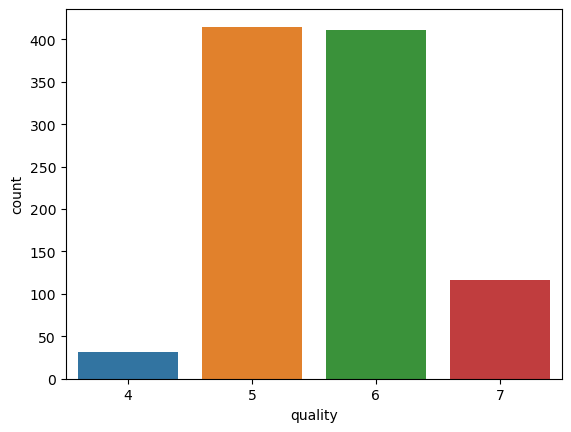

In [37]:
sns.countplot(data=df, x='quality')

In [38]:
# separate the data and Label
X = df.drop(columns=['quality'],axis=1)

# Converting multiclass to binary class 
# Any value less than 7 can be classified as bad ie 0 and quality of 7 is good ie 1
Y = [ 0 if i < 7 else 1 for i in df['quality']]
Y = pd.DataFrame(Y)


In [39]:
# Splitting the data
X_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3,random_state = 32)

# Cleaning test sets to avoid future warning messages
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# Scaling the data because features are on different scales.
standard_Scaler = StandardScaler()
X_train = standard_Scaler.fit_transform(X_train)
x_test = standard_Scaler.transform(x_test)



### Binary Quality Wine prediction using:
 - Logistic Regression, 
 - Decision Tree, 
 - Random Forest, 
 - K Nearest Neighbors 

In [40]:
### Wine Prediction model using Logistic Regression

# Initialize the model
log_reg=LogisticRegression()

# Train the model
log_reg.fit(X_train,y_train)

# Predict target variable with unseen data
y_pred=log_reg.predict(x_test)

accuracy = np.around(metrics.accuracy_score(y_test,y_pred),2)
precision = np.around(metrics.precision_score(y_test,y_pred),2)
recall = np.around(metrics.recall_score(y_test, y_pred),2)
f1 = np.around(metrics.f1_score(y_test, y_pred),2)

results = pd.DataFrame([['Logistic Regression', accuracy, precision, recall, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])


### Wine prediction model using Decision Tree

# Initialize the model
dt = DecisionTreeClassifier()

# Train the model
dt.fit(X_train,y_train)

# Predict target variable with unseen data
y_predict=dt.predict(x_test)

y_predict = dt.predict(x_test)

accuracy = metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

dt_results = pd.DataFrame([['Decision Tree', accuracy, precision, recall, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = pd.concat([results,dt_results],ignore_index=True)


### Wine prediction model using Random Forest

# Initialize the model
fit_rf = RandomForestClassifier(random_state=42,n_estimators = 200,criterion = 'gini', bootstrap=True,
                  max_features = None,
                  max_depth = 4)

# Train the model
fit_rf.fit(X_train,y_train)

# Predict target variable with unseen data
y_pred=dt.predict(x_test)

# Predicting values based on unseen data
y_pred = fit_rf.predict(x_test)

accuracy = np.around(metrics.accuracy_score(y_test,y_pred),2)
precision = np.around(metrics.precision_score(y_test,y_pred),2)
recall = np.around(metrics.recall_score(y_test, y_pred),2)
f1 = np.around(metrics.f1_score(y_test, y_pred),2)

rf_results = pd.DataFrame([['Random Forest', accuracy, precision, recall, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = pd.concat([results,rf_results],ignore_index=True)


### Wine Quality Prediction using KNN

from sklearn.neighbors import KNeighborsClassifier
# Initialize the model
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn.fit(X_train,y_train)

# Predict target variable with unseen data
pred = knn.predict(x_test)

accuracy = np.around(metrics.accuracy_score(y_test,y_pred),2)
precision = np.around(metrics.precision_score(y_test,y_pred),2)
recall = np.around(metrics.recall_score(y_test, y_pred),2)
f1 = np.around(metrics.f1_score(y_test, y_pred),2)

knn_results = pd.DataFrame([['KNN', accuracy, precision, recall, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = pd.concat([results,knn_results],ignore_index=True)

results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.880000,0.420000,0.350000,0.390000
1,Decision Tree,0.880546,0.423077,0.354839,0.385965
2,Random Forest,0.900000,0.530000,0.290000,0.380000
3,KNN,0.900000,0.530000,0.290000,0.380000


### Choosing Random Forest since training accuracy and test accuracy is comparitively better other algorithms

In [41]:
### Wine prediction model using Random Forest

# Initialize the model
fit_rf = RandomForestClassifier(random_state=42,n_estimators = 200,criterion = 'gini', bootstrap=True,
                  max_features = None,
                  max_depth = 4)

# Train the model
fit_rf.fit(X_train,y_train)

# Predicting values based on unseen data
y_pred = fit_rf.predict(x_test)

accuracy = np.around(metrics.accuracy_score(y_test,y_pred),2)
precision = np.around(metrics.precision_score(y_test,y_pred),2)
recall = np.around(metrics.recall_score(y_test, y_pred),2)
f1 = np.around(metrics.f1_score(y_test, y_pred),2)

rf_results = pd.DataFrame([['Random Forest', accuracy, precision, recall, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = pd.concat([results,rf_results],ignore_index=True)

### Plotting Area Under the Curve for analysis of Random Forest


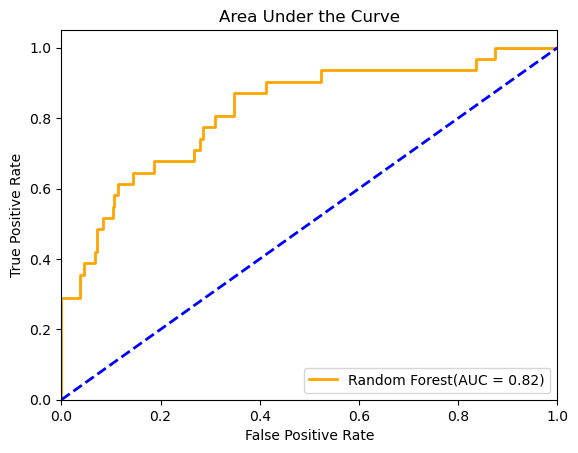

In [42]:
y_pred_proba = fit_rf.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.figure(1)
lw=2
plt.plot(fpr,tpr,color='orange',lw=lw,label='Random Forest(AUC = %0.2f)'%auc)
plt.plot([0,1],[0,1],color='blue',lw=lw,linestyle='--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Area Under the Curve")
# plt.legend(loc="upper left")
plt.legend(loc="lower right")


In [43]:
def create_conf_mat(y_test, predictions):
    """Function returns confusion matrix comparing two arrays"""
    if (len(y_test.shape) != len(predictions.shape) == 1):
        return print('Arrays entered are not 1-D.\nPlease enter the correctly sized sets.')
    elif (y_test.shape != predictions.shape):
        return print('Number of values inside the Arrays are not equal to each other.\nPlease make sure the array has the same number of instances.')
    else:
        # Set Metrics
        test_crosstb_comp = pd.crosstab(index = y_test,
                                        columns = predictions)
        # Changed for Future deprecation of as_matrix
        test_crosstb = test_crosstb_comp.values
        return test_crosstb

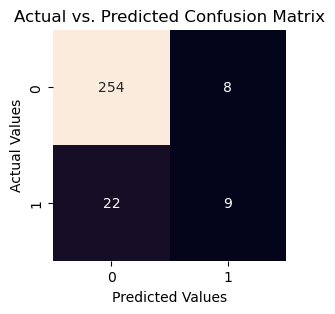

In [44]:
plt.figure(figsize=(3,3))
conf_mat = create_conf_mat(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()